# Week02, Part 1: Playing with Class Survey Results

Note: these are assuming you've given the class a survey asking about their previous statistics and programming experience.

For this notebook I'm using some faked class data.

### Topics:
  1. Reading in and plotting histograms of the class survey data using `hist` and `barplot`
  1. Practicing for-loops and if-statements
  1. Summary statistics for class data
  1. A few more data things we can do in R
  1. BACK TO SLIDES TO TALK ABOUT VARIABLE TYPES (numerical, categorical, etc)

To resize plots:

In [27]:
require(repr)
options(repr.plot.width=10, repr.plot.height=6)

## 1. Reading and plotting class survey data

Now we are going to continue to learn about how to read and look at data in R, again we are starting slow!

Let's begin by reading in the class survey results:

In [28]:
classData = read.csv("formatted_class_answers.csv")

Make sure this is stored somewhere you can remember!  You can put it in the same directory as this file (or whatever R-script you are working from) or you can specify a location.  For example, on my Mac I can specify the default `Downloads` folder as the location with:

```r
classData <- read.csv("formatted_class_answers.csv",header=TRUE,stringsAsFactors=FALSE)
```

What is in this dataset?

In [127]:
classData

X,familiarity.with.stats,programming.language,time.programming
<int>,<int>,<fct>,<fct>
1,3,R,< 6 months
2,3,R,Between 6 months to 1 year
3,2,Python,< 6 months
4,2,Shell,1-2 years
5,3,Python,< 6 months
6,2,Python,< 6 months
7,3,Python,Between 6 months to 1 year
8,2,C/C++,2-4 years
9,3,python,Between 6 months to 1 year


In [42]:
colnames(classData)

[1] "X"                      "familiarity.with.stats" "programming.language"  
[4] "time.programming"

Let's make a vector of the different languages folks use:

In [29]:
languages = classData[,3]

We can also ask for the "levels" of these catagories:

In [30]:
print(levels(languages))

[1] "C/C++"      "JavaScript" "python"     "Python"     "R"         
[6] "Shell"     


Let's try making some plots of the language data.

In [31]:
hist(languages) # should produce an error since "languages" is NOT a count - its a bunch of strings

ERROR: Error in hist.default(languages): 'x' must be numeric


Since `languages` is not numerical data, to make a histogram we have to play some tricks.  First, let's start by checking out the output of the `table` function:

In [32]:
table(languages) # shows how many "hits" for a specific language

languages
     C/C++ JavaScript     python     Python          R      Shell 
         1          1          2          5          3          1 

We can try using the `hist` function again:

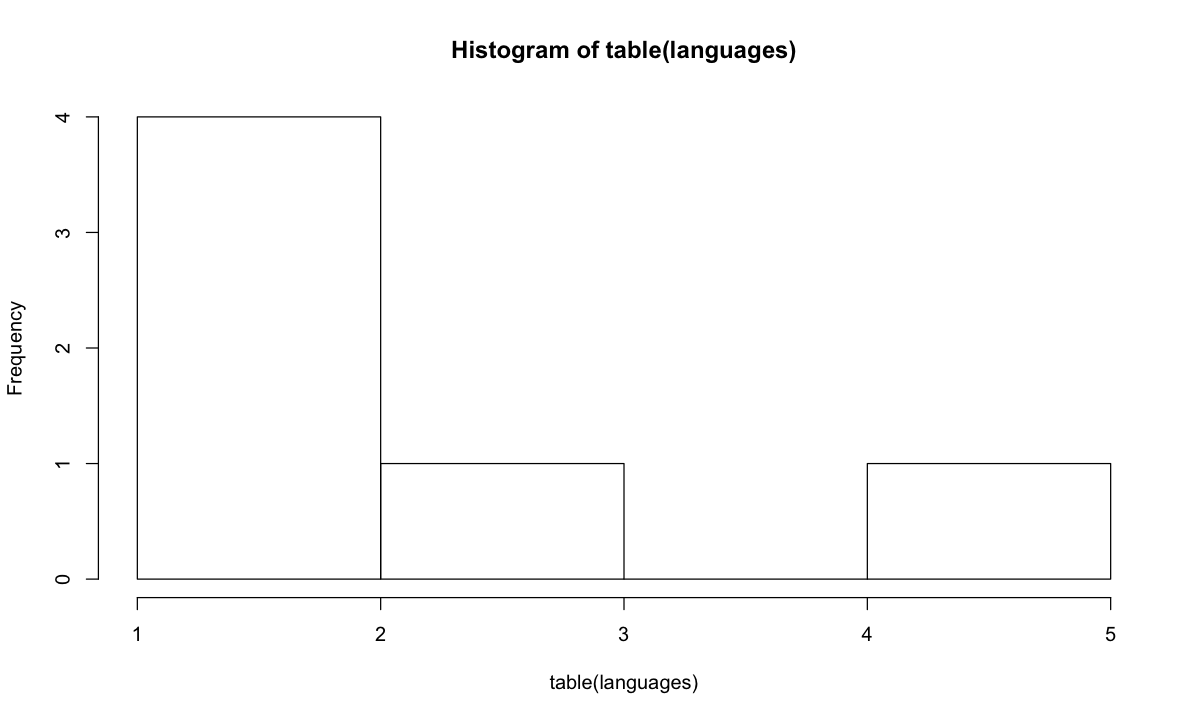

In [33]:
hist(table(languages)) # plots something now, but is actually counting # of bottom level, not counts

Not quite what we want, so let's try another plotting function called `barplot`:

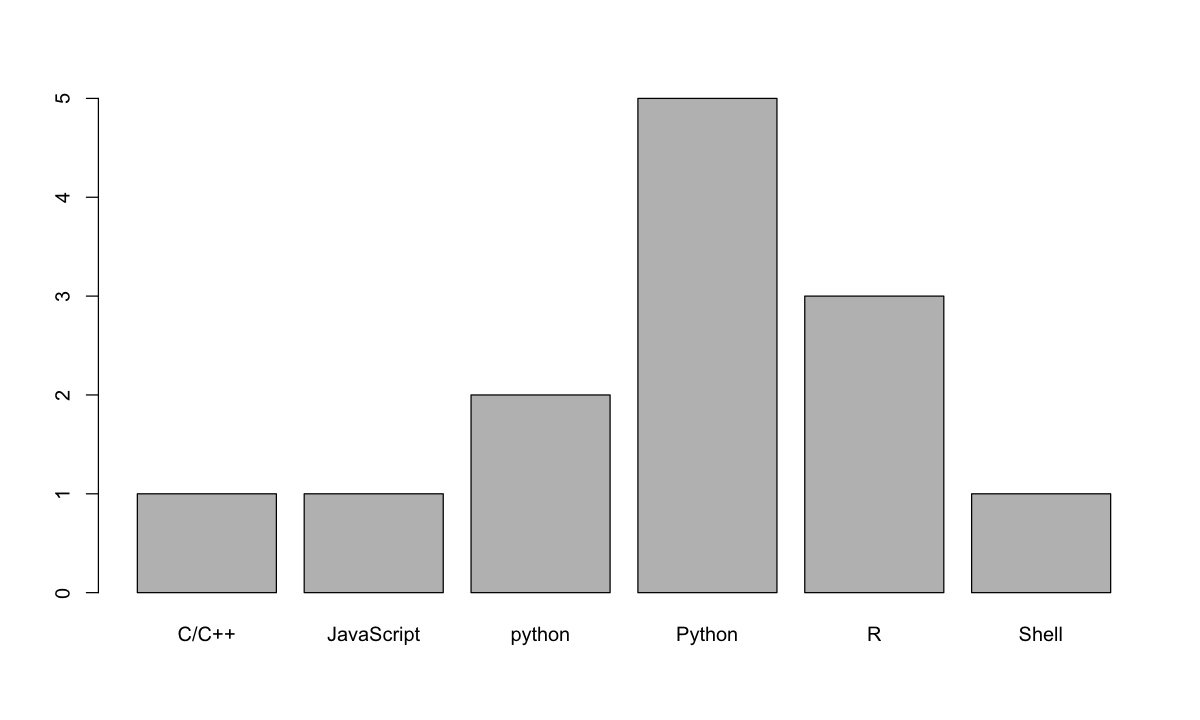

In [34]:
barplot(table(languages)) # which sort of does what we want

Note: there are some long strings that aren't showing we can try changing one - for example, "python" should be "Python":

In [35]:
print(levels(languages))

[1] "C/C++"      "JavaScript" "python"     "Python"     "R"         
[6] "Shell"     


In [36]:
print(levels(languages)[3]) # let's replace this

[1] "python"


In [37]:
levels(languages)[3] = "Python"

In [38]:
levels(languages)

[1] "C/C++"      "JavaScript" "Python"     "R"          "Shell"

Let's try replotting:

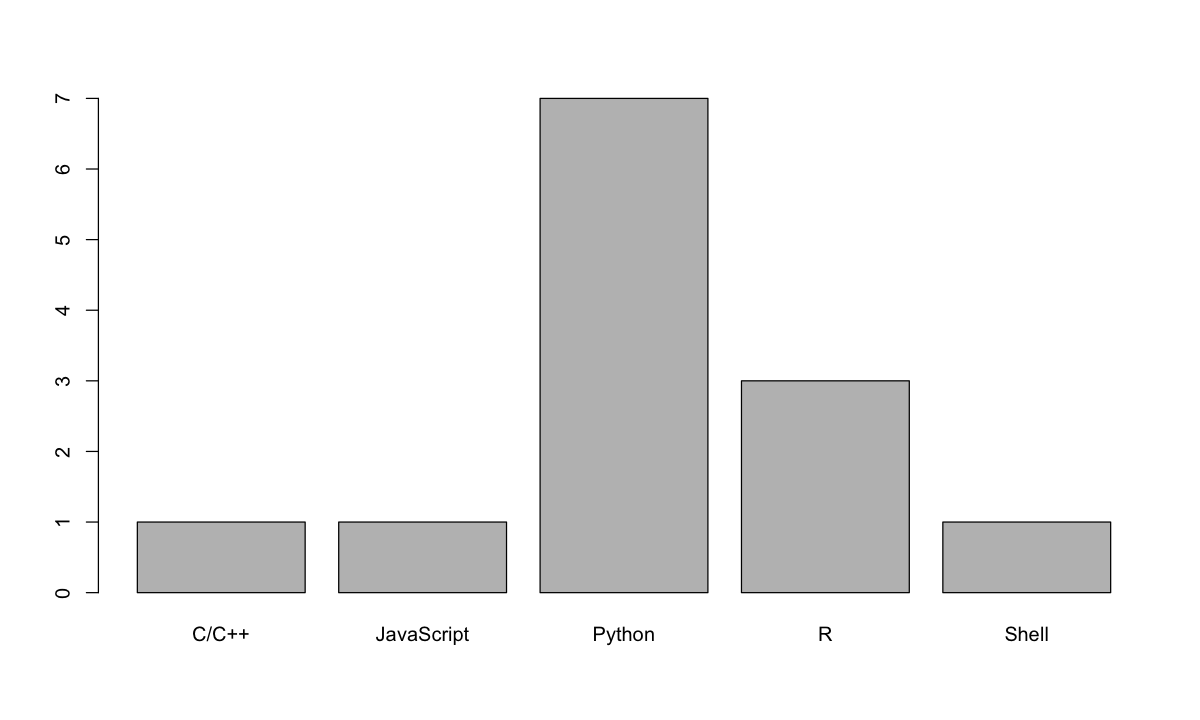

In [39]:
barplot(table(languages))

But what is the y axis?

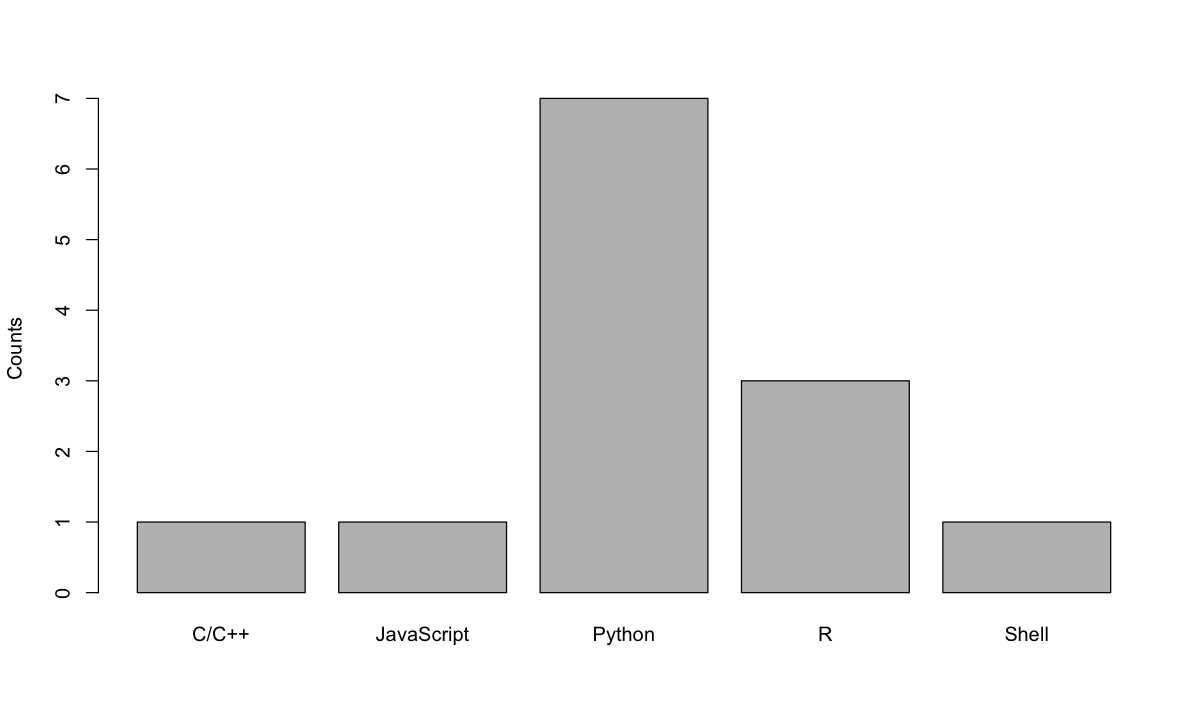

In [40]:
barplot(table(languages),ylab='Counts')

Ok, but for many languages this can be hard to see $\rightarrow$ maybe different colors for each? count 3 different answers, so:

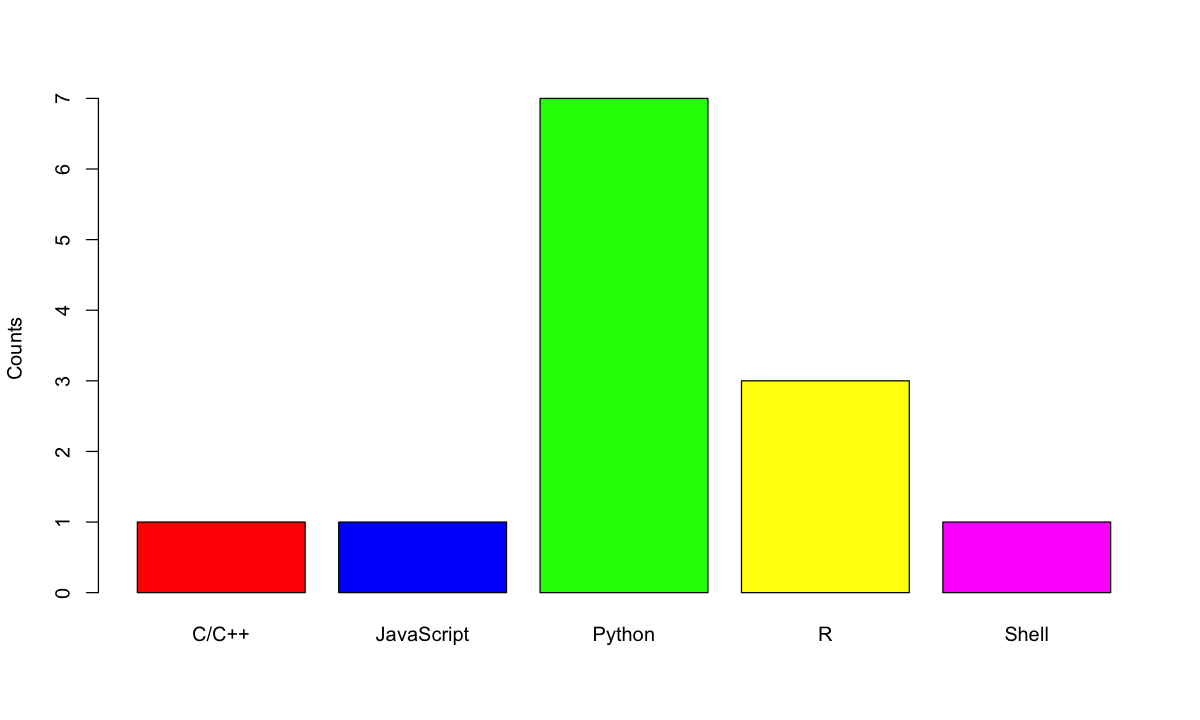

In [41]:
barplot(table(languages),ylab='Counts',col=c("red","blue","green","yellow","magenta"))

Ok cool, we see that a lot of folks use Python.

We can do the same sort of thing for the length of time folks have been coding:

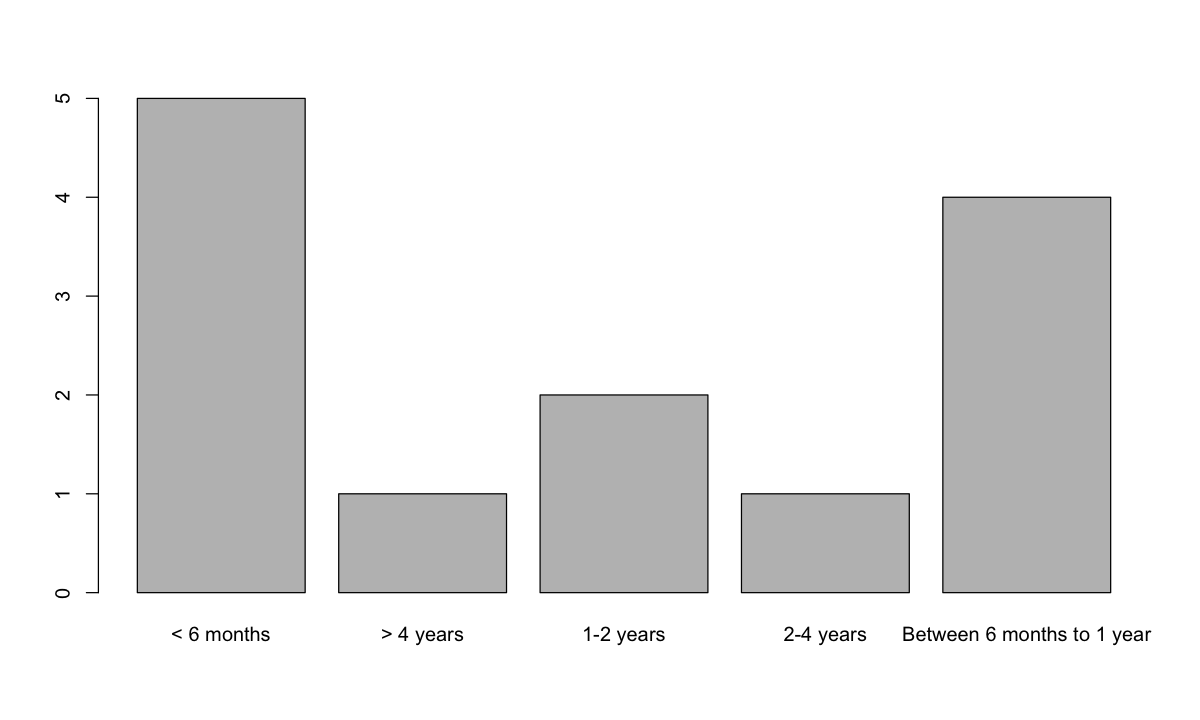

In [43]:
time_in = classData[,4]
barplot(table(time_in)) # note: you will probably have to expand the x-axis window in RStudio

In RStudio, you'll have to expand the window to see all the labels, but here we can do:

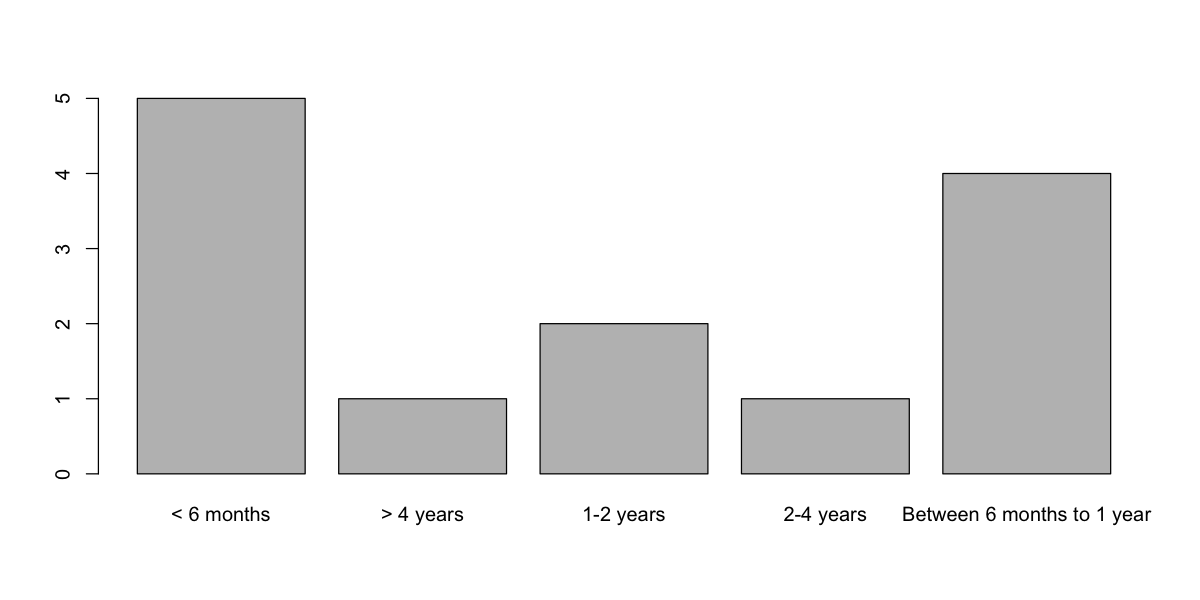

In [44]:
options(repr.plot.width=10, repr.plot.height=5)
barplot(table(time_in)) # note: you will probably have to expand the x-axis window in RStudio

Ok, so this tells us *something* but its hard to get a sense of the actual timescales since they are not ordered & are non-uniform increments of time.

Additionally, things are "out of order" because they don't fall in nice ordered time bins.  This is because this data is stored as "categorical" data, i.e. in this case as strings:

In [101]:
levels(time_in)

[1] "< 6 months"                 "> 4 years"                 
[3] "1-2 years"                  "2-4 years"                 
[5] "Between 6 months to 1 year"

## 2. Practicing for-loops and if-statements

Let's reformat this data a bit and get some practice with for-loops in R in the process!

In [105]:
time_min = c() # storage, save the min edge of our bins in years
time_max = c() # storage, save the max edge of our bins in years

Let's look at the options again:

In [106]:
myLevels = levels(time_in)
print(myLevels)

[1] "< 6 months"                 "> 4 years"                 
[3] "1-2 years"                  "2-4 years"                 
[5] "Between 6 months to 1 year"


Now we get to practice doing a for-loop in R.  Note, it is similar to how it's done in Python, but there are a few differences!  The syntax is generally:

```r
for (loop_index in 1:Number_of_loops){
   # DO STUFF
}
```

Note that this definition includes `{}` instead of indentations to denote what is contained in the for-loop.  if-statements are denoted similary as we'll see below:

Let's do a for loop and determine bins by hand:

In [107]:
for (i in 1:length(time_in)){
  if (time_in[i] == "< 6 months"){ # < 6 months
    time_min = c(time_min,0)
    time_max = c(time_max, 0.5) # in years => 0.5 years = 6 months
  } else if (time_in[i] == "Between 6 months to 1 year") { # 0.5-1 years
    time_min = c(time_min, 0.5)
    time_max = c(time_max, 1.0)
  } else if (time_in[i] == "1-2 years") { # 1-2 years
    time_min = c(time_min, 1.0)
    time_max = c(time_max, 2.0)
  } else if (time_in[i] == "2-4 years") { # 2-4 years
    time_min = c(time_min, 2.0)
    time_max = c(time_max, 4.0)
  } else { # otherwise, >4 years
    time_min = c(time_min,4.0) 
    time_max = c(time_max,5.0) # just giving an arbitrary upper bound of 5 years
  }
}

In [108]:
print(time_min)
print(time_max)

 [1] 0.0 0.5 0.0 1.0 0.0 0.0 0.5 2.0 0.5 1.0 0.5 0.0 4.0
 [1] 0.5 1.0 0.5 2.0 0.5 0.5 1.0 4.0 1.0 2.0 1.0 0.5 5.0


Let's say the mid-point of this data is the `time`:

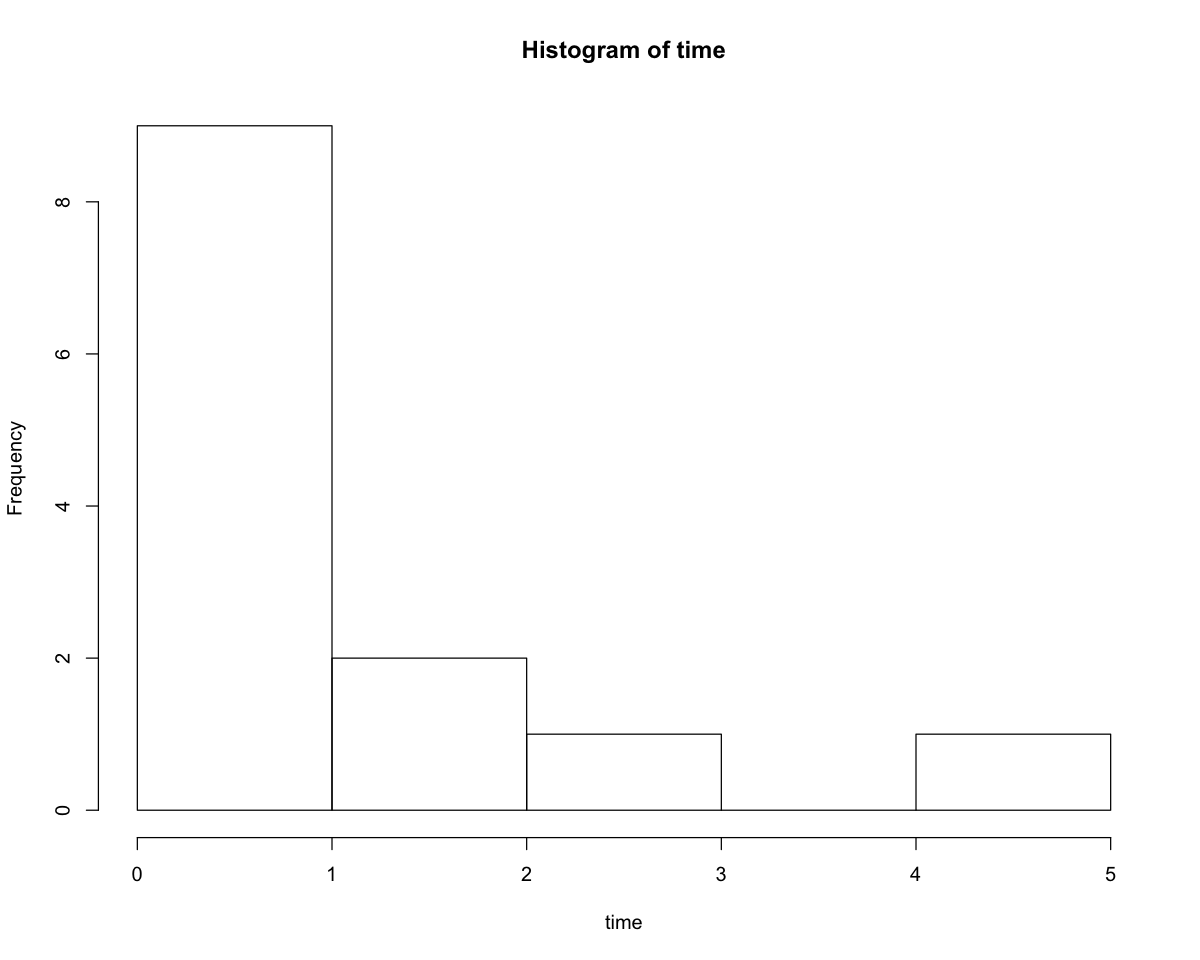

In [109]:
time = 0.5*(time_min+time_max)
hist(time)

Note of course, in reality, the bins are not the same size so we can manually change the break-points to more accurately represent the data:

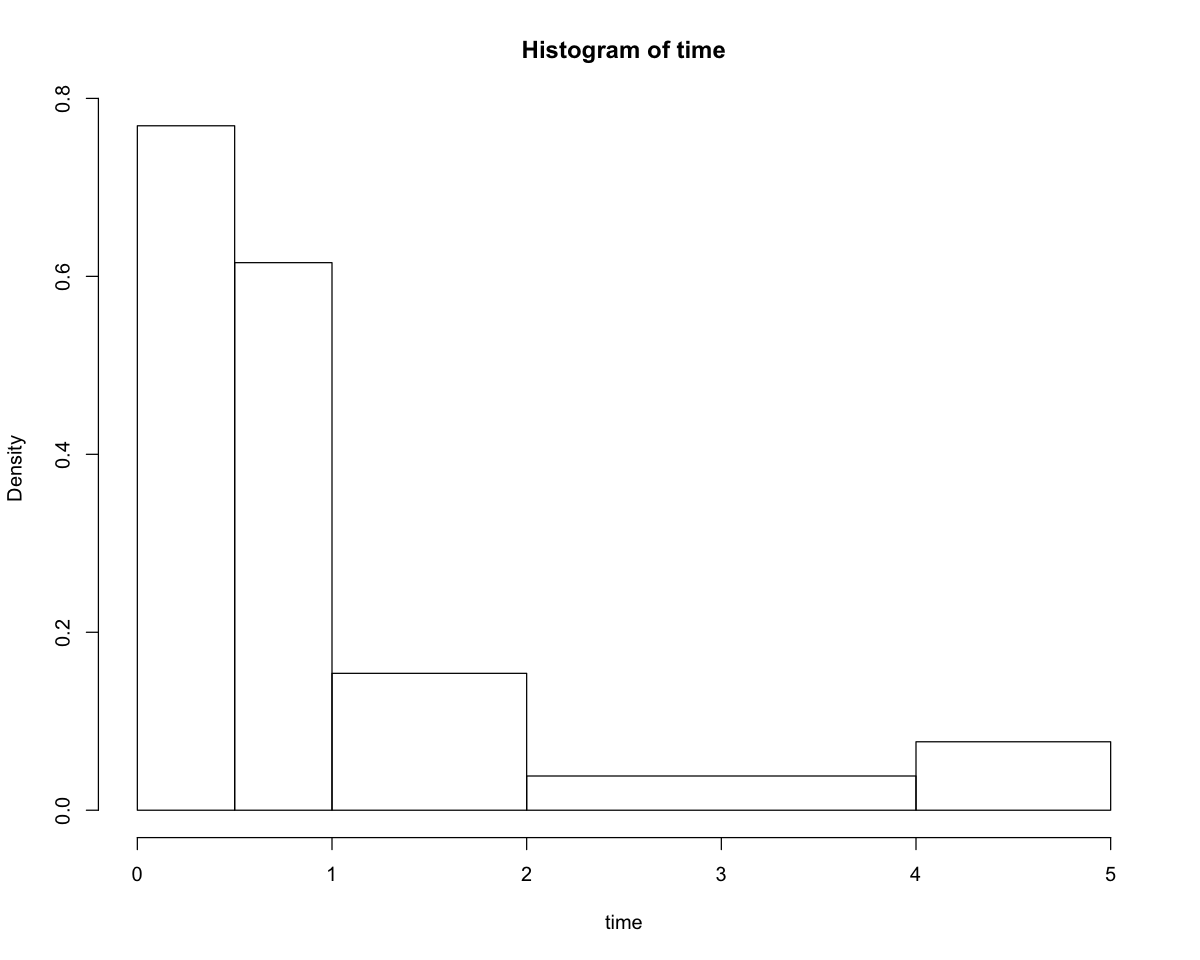

In [110]:
hist(time,breaks=c(0.0,0.5,1,2,4,5))

Hmmm, but that looks like density, not counts, how do we get counts?

In [111]:
help(hist)

See there is a "freq" variable, set to `TRUE` to get counts:

Warning message in plot.histogram(r, freq = freq1, col = col, border = border, angle = angle, :
“the AREAS in the plot are wrong -- rather use 'freq = FALSE'”


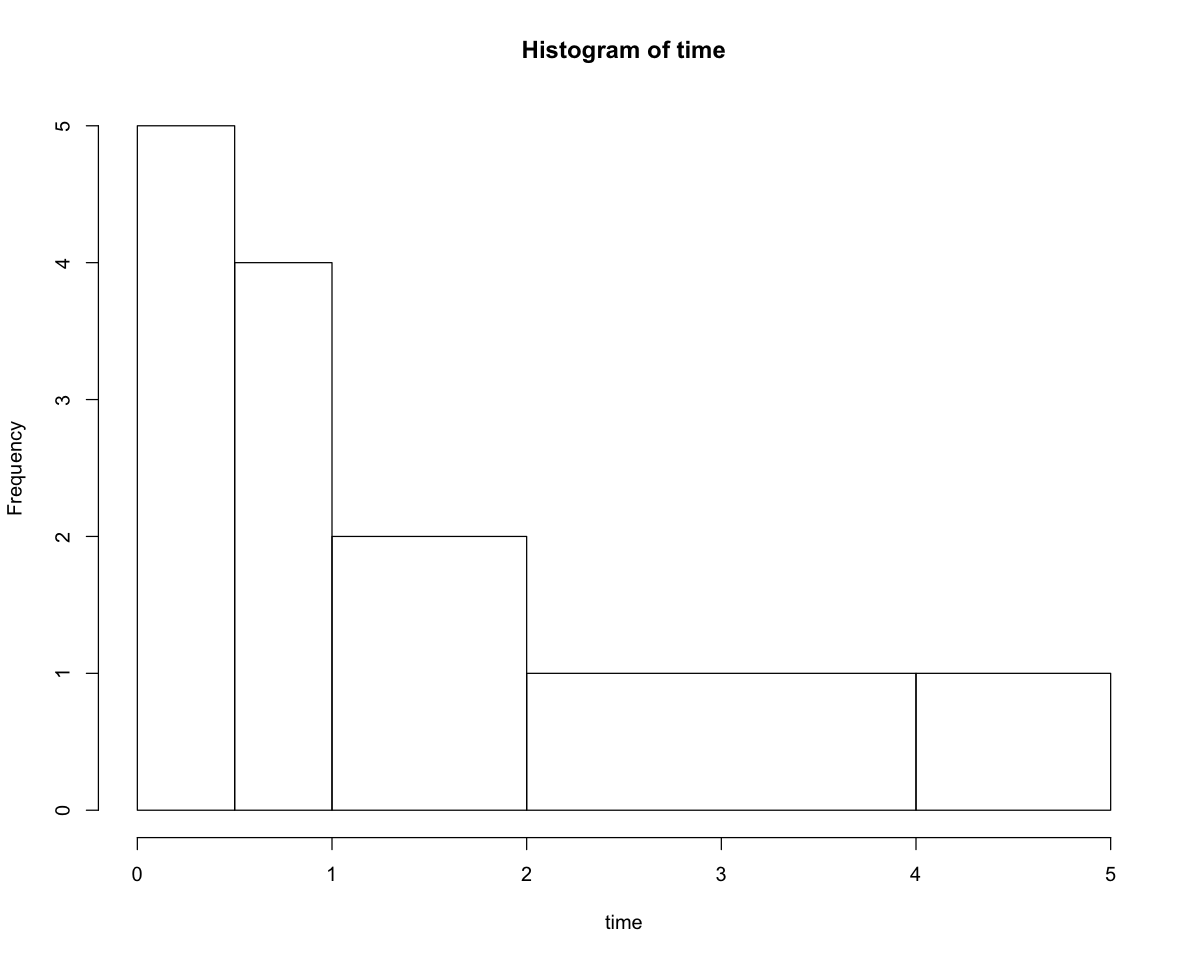

In [112]:
hist(time,breaks=c(0.0,0.5,1,2,4,5),freq=TRUE)

We get an error telling us that the areas are wrong, but we have to think about what that means for us $\rightarrow$ do we actually care?  Density is telling us the frequency over the unit time, but thats not what we really want $\rightarrow$ we want counts with bars representing actual times.

Picking which one depends on your data & how you want to present it and you have to make sure to think about it.

## 3. Summary statistics for class data

Let's look at some summary stats for our data for how long folks have been programming:

In [113]:
summary(time)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.250   0.250   0.750   1.135   1.500   4.500 

Let's over plot where these are on our histograms using another plotting function called `abline` that overplots lines on our plots:

Warning message in plot.histogram(r, freq = freq1, col = col, border = border, angle = angle, :
“the AREAS in the plot are wrong -- rather use 'freq = FALSE'”


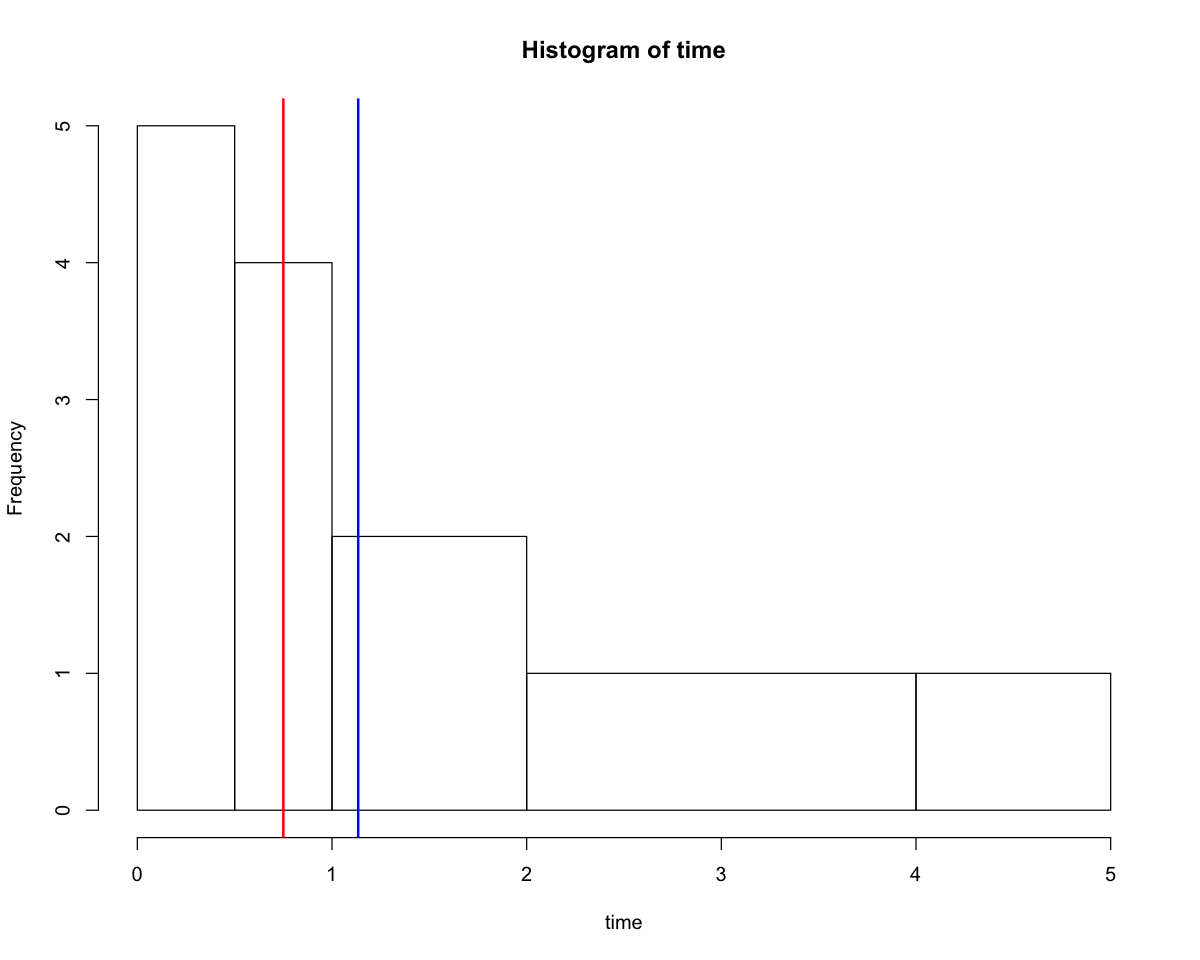

In [114]:
hist(time,breaks=c(0.0,0.5,1,2,4,5),freq=TRUE)

abline(v = mean(time), col = "blue", lwd = 2)
abline(v = median(time), col = "red", lwd = 2)

Let's also add a legend:

Warning message in plot.histogram(r, freq = freq1, col = col, border = border, angle = angle, :
“the AREAS in the plot are wrong -- rather use 'freq = FALSE'”


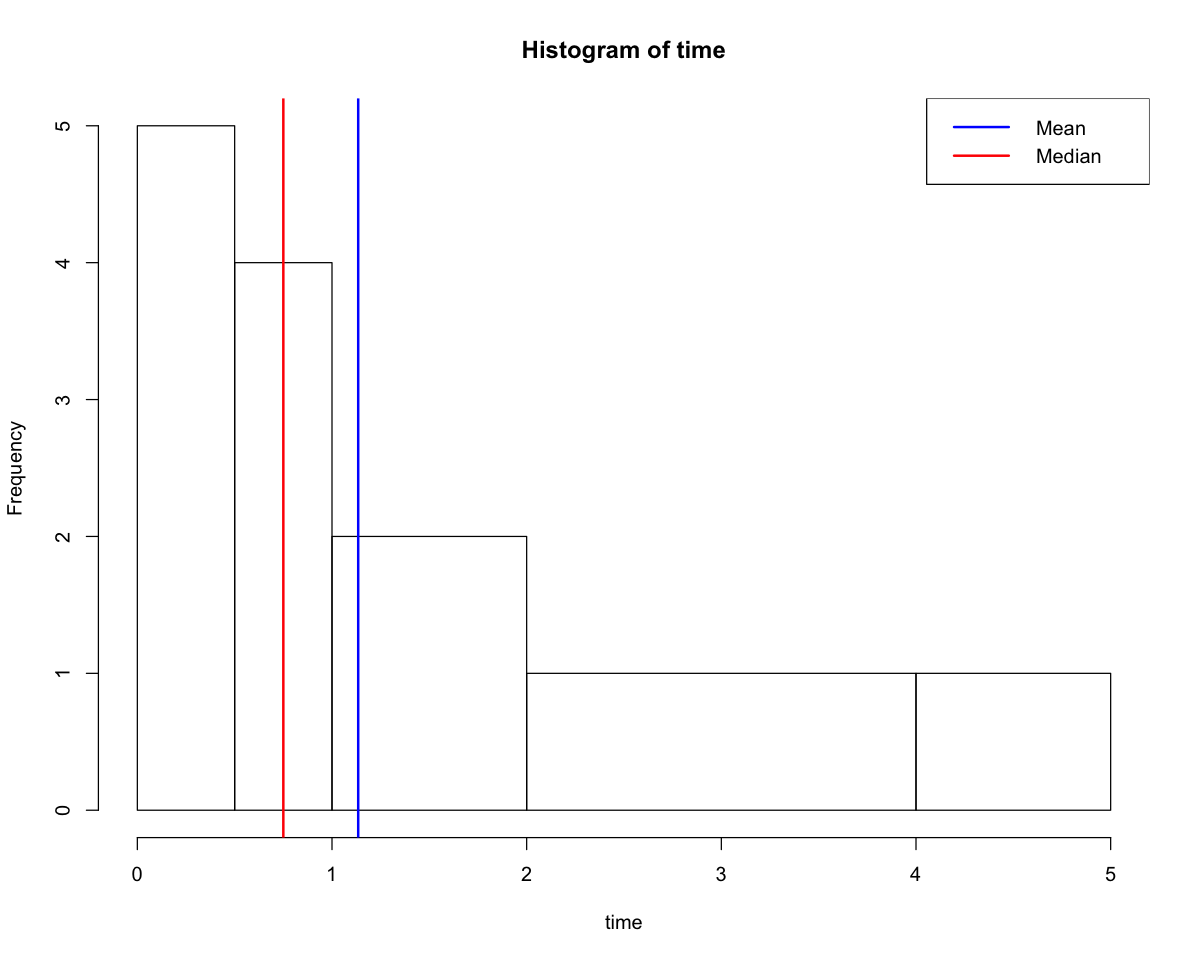

In [115]:
hist(time,breaks=c(0.0,0.5,1,2,4,5),freq=TRUE)

abline(v = mean(time), col = "blue", lwd = 2)
abline(v = median(time), col = "red", lwd = 2)

legend("topright",c("Mean","Median"),col=c("blue","red"),lwd=2)

Something to think about - does the mean or median describe the distribution better here?  What do they mean if the box sizes are different?  Keep this thoughts with you over the next few classes.

Now let's say we add the data of an old person in like myself that has been programming for a bit:

In [116]:
new_time = c(time,18.0) 

Let's overplot the mean and median of our new time on our old histogram:

Warning message in plot.histogram(r, freq = freq1, col = col, border = border, angle = angle, :
“the AREAS in the plot are wrong -- rather use 'freq = FALSE'”


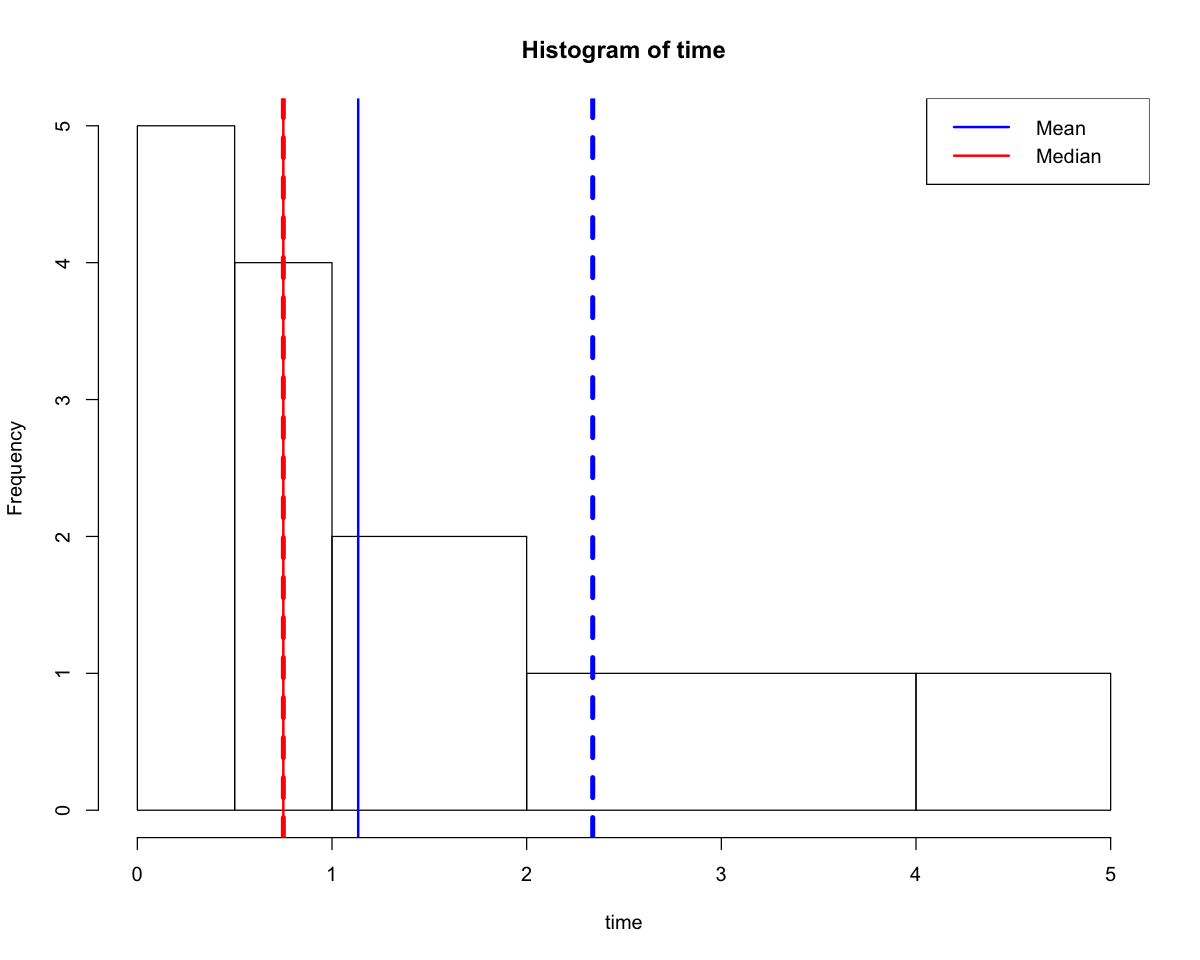

In [117]:
# old plot
hist(time,breaks=c(0.0,0.5,1,2,4,5),freq=TRUE)
abline(v = mean(time), col = "blue", lwd = 2)
abline(v = median(time), col = "red", lwd = 2)
legend("topright",c("Mean","Median"),col=c("blue","red"),lwd=2)

# new additions
abline(v=mean(new_time),col="blue",lwd=4,lty=2)
abline(v=median(new_time),col="red",lwd=4,lty=2)

We see that the mean changes a lot, BUT the median does not $\rightarrow$ this is very interesting to think about when we want to characterize our data.

Let's try the same exercise with the standdard deviation and the interquartile range (IQR).  This time we'll try making some lines on our plot using the `lines` function instead of `abline` for some variety, first with our original dataset:

Warning message in plot.histogram(r, freq = freq1, col = col, border = border, angle = angle, :
“the AREAS in the plot are wrong -- rather use 'freq = FALSE'”


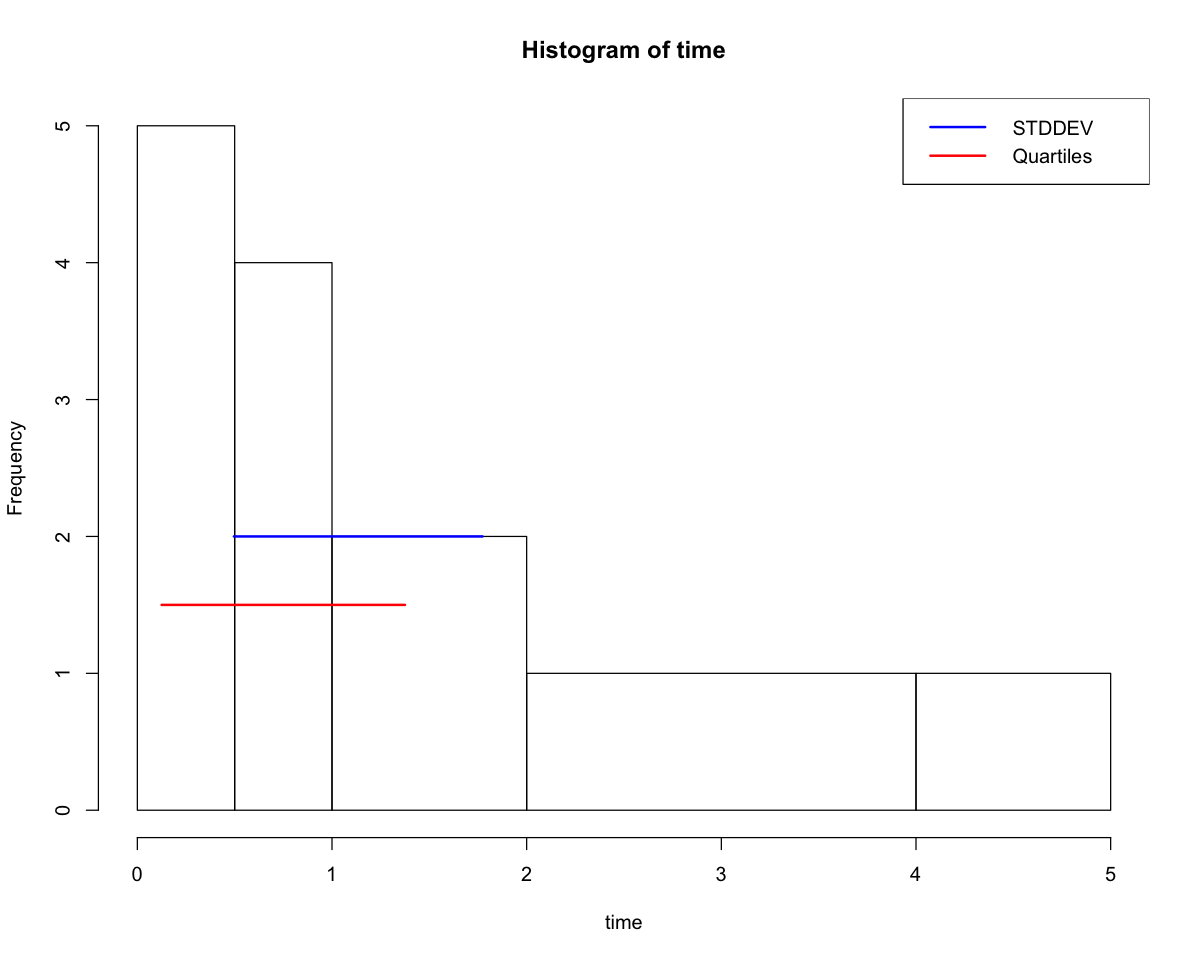

In [118]:
hist(time,breaks=c(0.0,0.5,1,2,4,5),freq=TRUE)

#  Usually (and later on in class) we'll talk about full STDDEV's around the mean, 
#    but 1/2 STDDEV is a little easier to see here
lines(c(mean(time)-0.5*sd(time),mean(time)+0.5*sd(time)),c(2,2), col="blue",lwd=2)
# lets add the 25th & 75th quantiles
lines(c(median(time)-0.5*IQR(time),median(time)+0.5*IQR(time)), c(1.5,1.5), col="red",lwd=2)

# again, lets add a little legend
legend("topright",c("STDDEV","Quartiles"),col=c("blue","red"),lwd=2)

And let's see how both of these change with adding my data point:

Warning message in plot.histogram(r, freq = freq1, col = col, border = border, angle = angle, :
“the AREAS in the plot are wrong -- rather use 'freq = FALSE'”


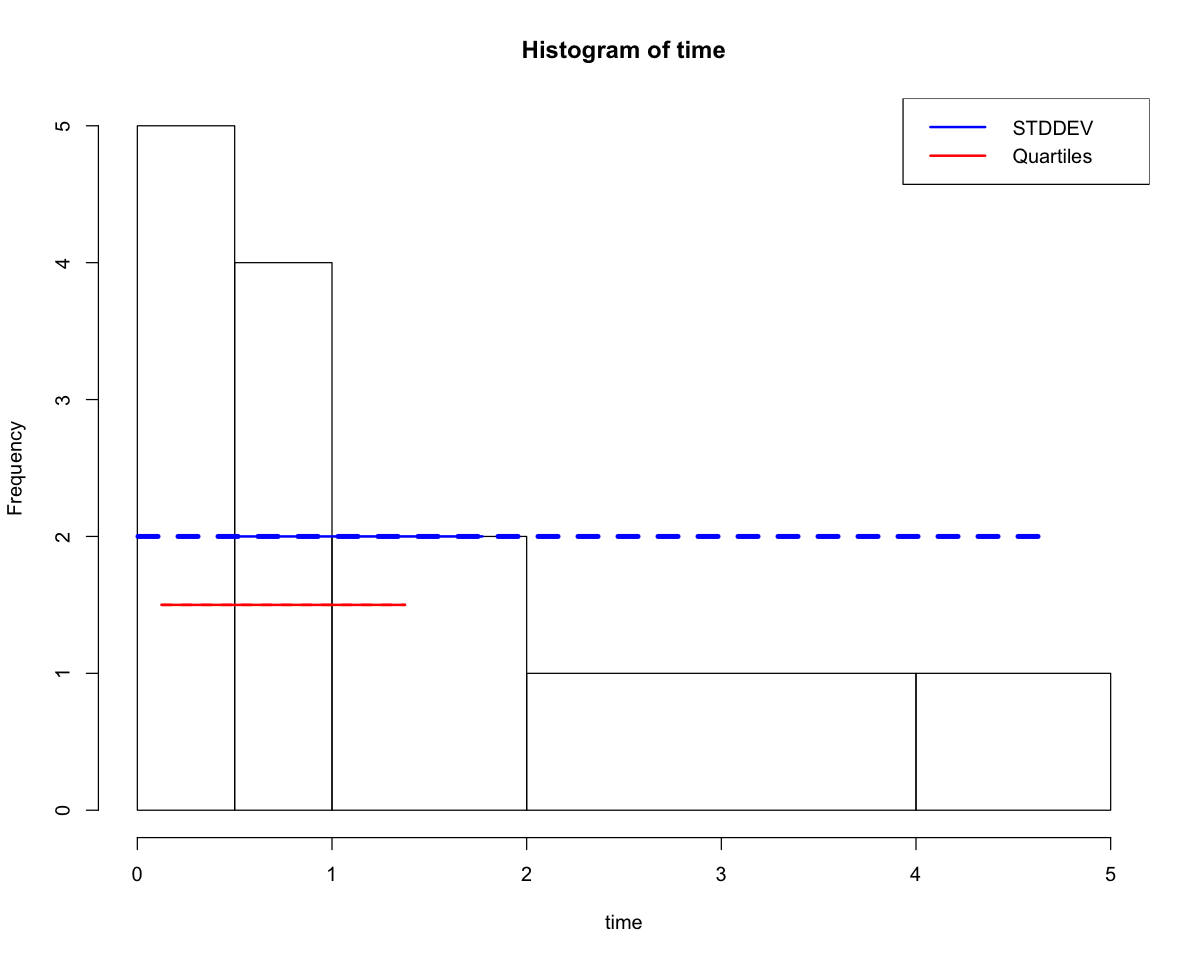

In [119]:
# Old plot
hist(time,breaks=c(0.0,0.5,1,2,4,5),freq=TRUE)
lines(c(mean(time)-0.5*sd(time),mean(time)+0.5*sd(time)),c(2,2), col="blue",lwd=2)
lines(c(median(time)-0.5*IQR(time),median(time)+0.5*IQR(time)), c(1.5,1.5), col="red",lwd=2)
legend("topright",c("STDDEV","Quartiles"),col=c("blue","red"),lwd=2)

# new points
lines(c(mean(new_time)-0.5*sd(new_time),mean(new_time)+0.5*sd(new_time)),
      c(2,2), col="blue",lwd=4, lty=2)
lines(c(median(new_time)-0.5*IQR(new_time),median(new_time)+0.5*IQR(new_time)), 
      c(1.5,1.5), col="red",lwd=2,lty=2)

So, we also see that while the standdard deviation changes a lot with new and very different data, the quantiles do not (as much) -- also something interesting to consider in characterizing data!

## 4. A few more things we can do with data

In RStudio, there a few helpful things you can try, like:

```r
View(classData)
```

Or double clicking on "classData" in the "Global Environment" panel.

We can make a dotchart of the programming time range:

Changing plot size again.

In [120]:
options(repr.plot.width=10, repr.plot.height=8)

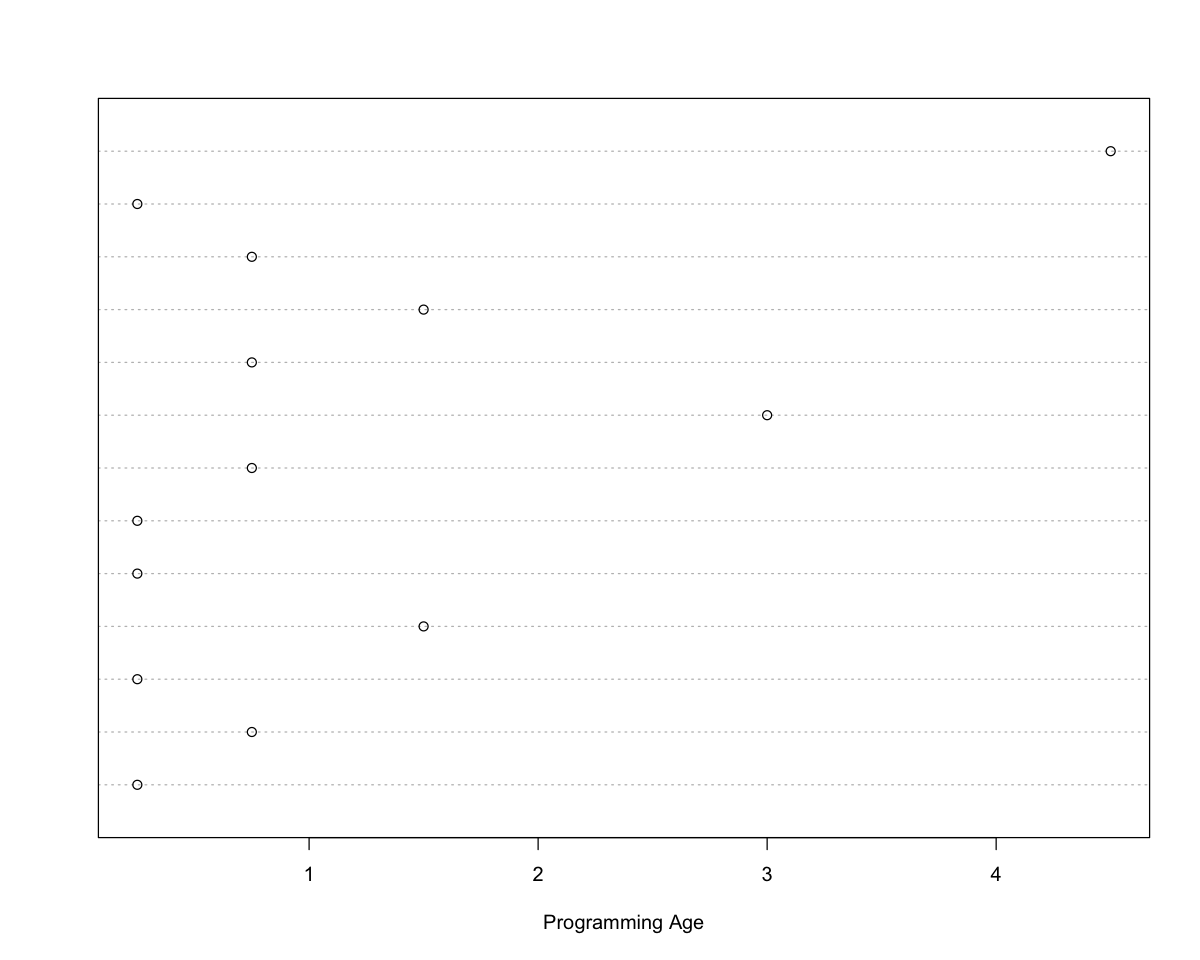

In [121]:
dotchart(time,xlab="Programming Age")

We can sort of see that there are a lot of dots $\lesssim$ 1 year, and a few at 3 years.

Note here: y-axis means nothing for dotcharts.

Can also see that in a boxplot:

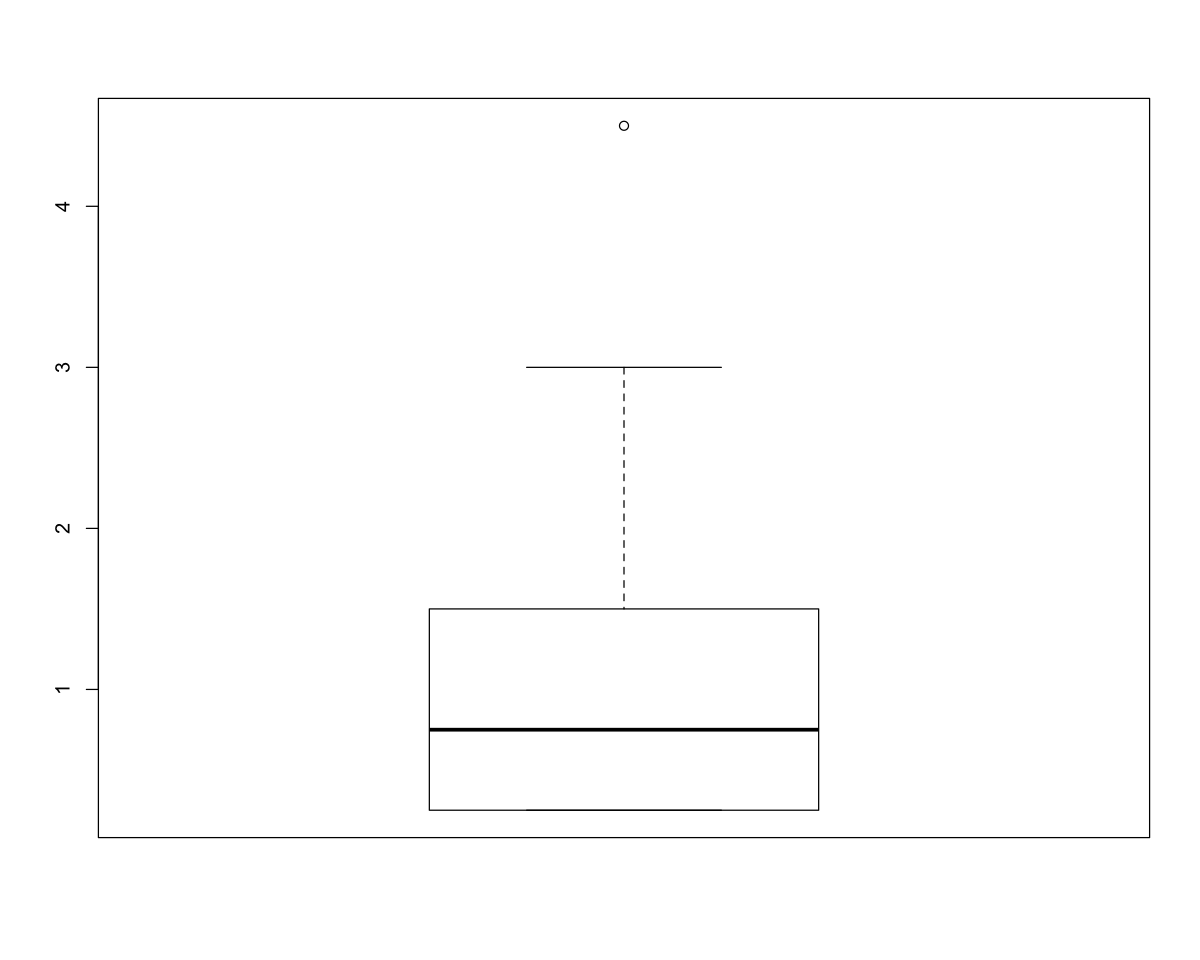

In [122]:
boxplot(time)

Note: we would usually have whiskers at the tops *and* bottoms but this can be different for different distributions.

Maybe lets remind ourselves of what we are plotting:

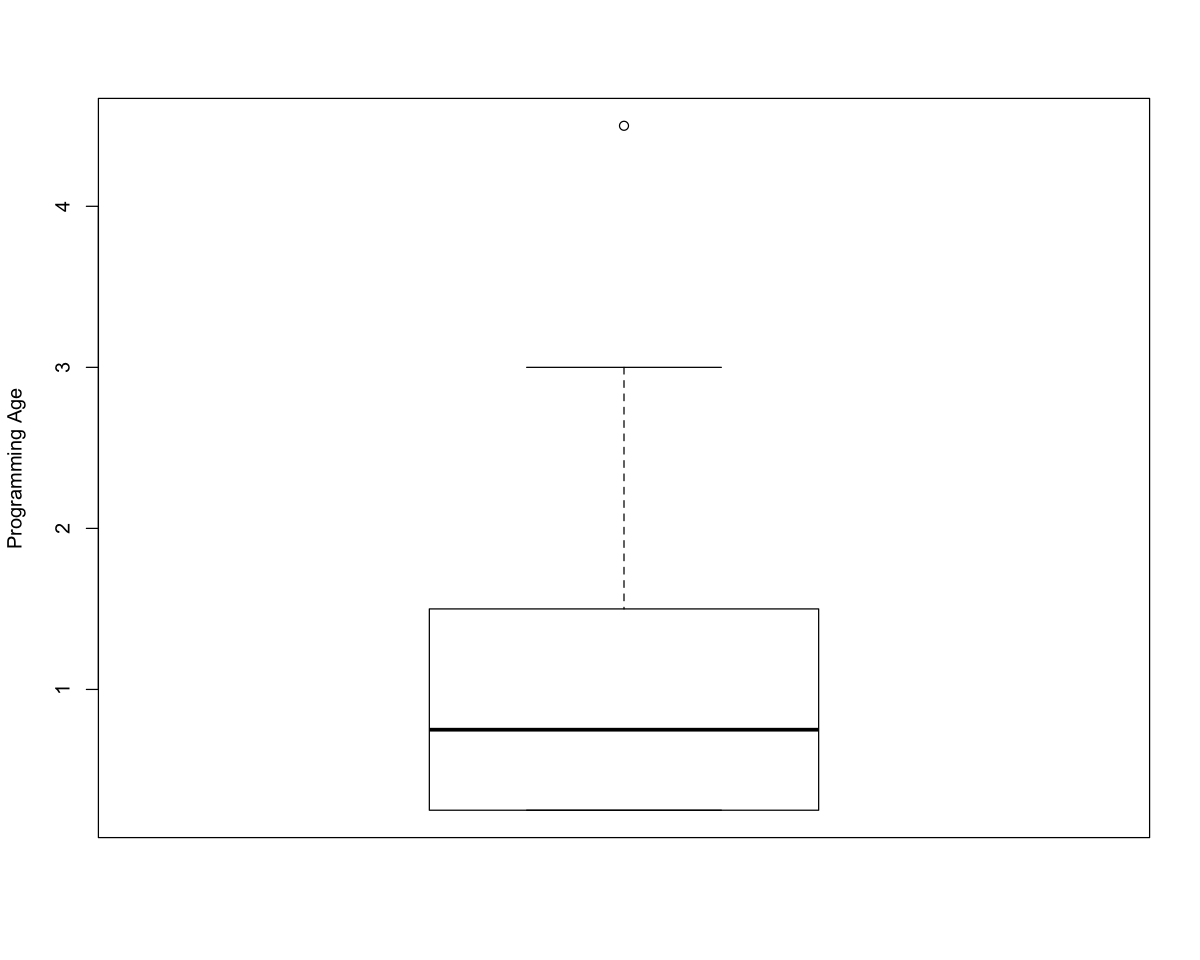

In [123]:
boxplot(time,ylab="Programming Age")

For this last one, lets also overlay the boxplot for newtime too:

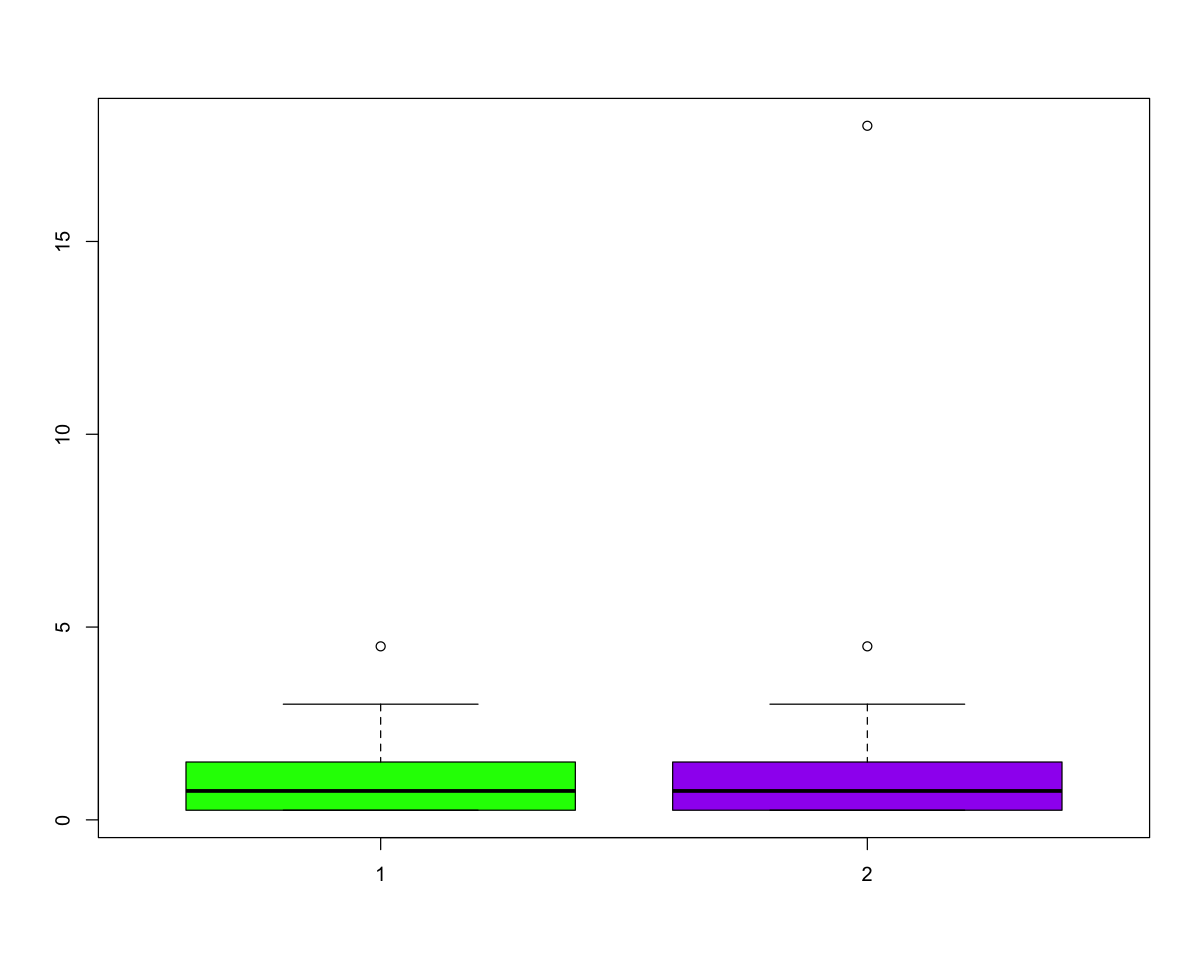

In [124]:
boxplot(time,new_time, col=c("green","purple"))

... and lets add a little legend too:

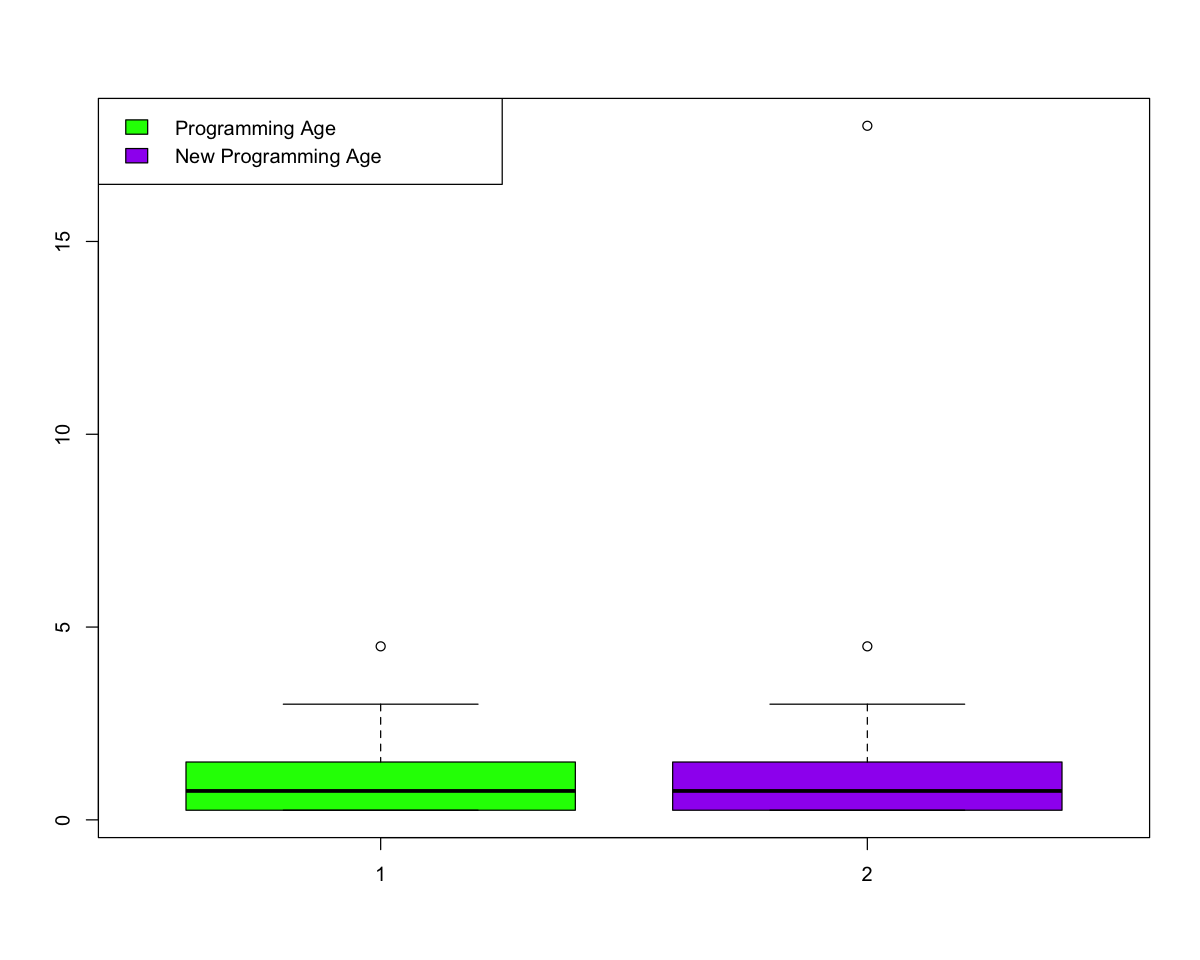

In [125]:
boxplot(time,new_time, col=c("green","purple"))
legend("topleft",c("Programming Age","New Programming Age"),fill=c("green","purple"))

Now we can see that again - the boxplots don't change a huge amount, only the new age one now includes an outlier point for my old-person programming age.

There are also a bunch of parameters you can change with boxplots we aren't going to get into here.

# BACK TO SLIDES ABOUT VARIABLE TYPES